In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import nfode
import torch.jit
device = torch.device('cpu')
import random
from datetime import datetime

if __name__ == "__main__":
    data = np.load('data_set.npz')
    t_data = data['t_data']
    x_data = data['x_data']
    
    x_data = torch.tensor(x_data, dtype=torch.float32).requires_grad_(True).to(device)
    t_data = torch.tensor(t_data, dtype=torch.float32).requires_grad_(True).to(device)

input_dim=2
output_dim=2
inner_dim=10000
class ODEModel(nn.Module):
    def __init__(self):
        super(ODEModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, inner_dim)
        self.fc2 = nn.Linear(inner_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = ODEModel()
nfode.initialize_params_uniform(model)

In [17]:
num_epochs = 600
k = 1
lr = 0.1
milestones = []
gamma = 0.1
model, x_preds, loss_curve, real_loss_curve = nfode.train(model, device, t_data, x_data, num_epochs = num_epochs, k=k, lr=lr, milestones=milestones, gamma=gamma)
torch.save(model, 'model.pt')

1 10 / 600 17:40:20 cpu best real loss: 100
1 20 / 600 17:40:35 cpu best real loss: 100
1 30 / 600 17:40:49 cpu best real loss: 100
1 40 / 600 17:41:03 cpu best real loss: 100
1 50 / 600 17:41:18 cpu best real loss: 100
1 60 / 600 17:41:34 cpu best real loss: 100
1 70 / 600 17:41:50 cpu best real loss: 100
1 80 / 600 17:42:05 cpu best real loss: 100
1 90 / 600 17:42:21 cpu best real loss: 100
1 100 / 600 17:42:35 cpu best real loss: 100
1 110 / 600 17:42:51 cpu best real loss: 100
1 120 / 600 17:43:06 cpu best real loss: 100
1 130 / 600 17:43:21 cpu best real loss: 100
1 140 / 600 17:43:37 cpu best real loss: 100
1 150 / 600 17:43:53 cpu best real loss: 100
1 160 / 600 17:44:13 cpu best real loss: 100
1 170 / 600 17:44:30 cpu best real loss: 100
1 180 / 600 17:44:47 cpu best real loss: 100
1 190 / 600 17:45:03 cpu best real loss: 100
1 200 / 600 17:45:20 cpu best real loss: 100
1 210 / 600 17:45:36 cpu best real loss: 100
1 220 / 600 17:45:51 cpu best real loss: 100
1 230 / 600 17:46:0

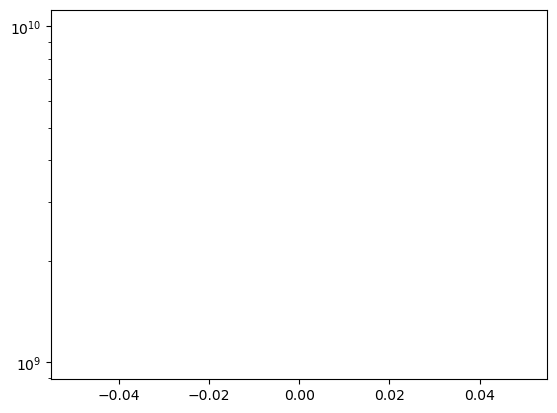

In [18]:
plt.plot(real_loss_curve)
plt.yscale('log')

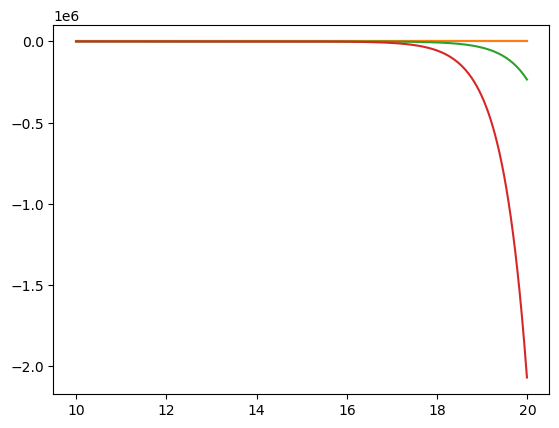

In [19]:
#model = torch.load('model.pt')
data = np.load('data_test.npz')
t_data_test = data['t_data']
x_data_test = data['x_data']
x_data_test = torch.tensor(x_data_test, dtype=torch.float32).to(device)
t_data_test = torch.tensor(t_data_test, dtype=torch.float32).unsqueeze(1).to(device)
x0 = x_data_test[:,0]
model.to(device)
x_preds_test = nfode.predict(model, t_data_test, x0)
t_data_test = t_data_test.cpu().detach().numpy()
x_data_test = x_data_test.cpu().detach().numpy()
plt.plot(t_data_test, x_data_test.T)
plt.plot(t_data_test, x_preds_test)